* Data Source:
1. http://sipi.usc.edu/database/
2. https://www.csd.uwo.ca/Courses/CS9630a/

In [0]:
import cv2
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!ls /content/drive/My\ Drive/107-2Multimedia

cat.jpg  cy.jpg


# **Colorspaces and conversion**

In [10]:
!pip install pytictoc

In [0]:
from pytictoc import TicToc
t = TicToc() #create instance of class

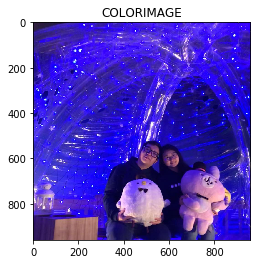

Elapsed time is 0.629416 seconds.


In [12]:
t.tic()
img = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.title('COLORIMAGE')#,plt.xticks([]),plt.yticks([])
plt.show()
t.toc()

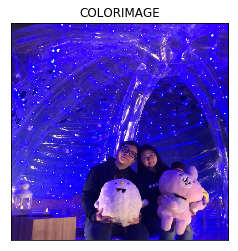

In [13]:
plt.imshow(img),plt.title('COLORIMAGE'),plt.xticks([]),plt.yticks([])
plt.show()

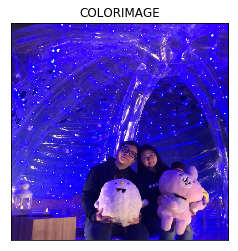

Elapsed time is 0.266371 seconds.


In [14]:
t.tic()
img2 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
b,g,r = cv2.split(img2)
img2 =cv2.merge((r,g,b))
plt.imshow(img2),plt.title('COLORIMAGE'),plt.xticks([]),plt.yticks([])
plt.show()
t.toc()

In [15]:
j = 0
for filename in dir(cv2):
  if filename.startswith('COLOR_'):
    print(filename)
    j+=1
print('Ther are ' + str(j) + 'Colorspace Conversion flags in OpenCV')

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
CO

In [16]:
import numpy as np
c = cv2.cvtColor(np.uint8([[[255,0,0]]]),cv2.COLOR_BGR2HSV)
print(c)

[[[120 255 255]]]


# **Tracking based on color**

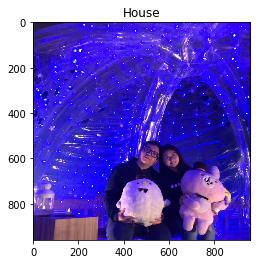

In [17]:
img3 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3),plt.title('House')#,plt.xticks([]),plt.yticks([])
plt.show()

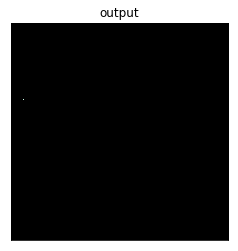

In [18]:
hsv = cv2.cvtColor(img3, cv2.COLOR_RGB2HSV)
image_mask = cv2.inRange(hsv, np.array([40,50,50]), np.array([80,255,255]))
output = cv2.bitwise_and(img3, img3, mask=image_mask)
plt.imshow(output),plt.title('output'),plt.xticks([]),plt.yticks([])
plt.show()

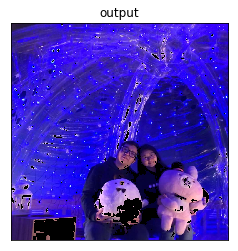

In [19]:
blue = cv2.inRange(hsv, np.array([100,50,50]), np.array([255,255,255]))
green = cv2.inRange(hsv, np.array([40,50,50]), np.array([255,255,255]))
image_mask = cv2.add(blue, green)
output = cv2.bitwise_and(img3, img3, mask=image_mask)
plt.imshow(output),plt.title('output'),plt.xticks([]),plt.yticks([])
plt.show()

# **Image transformations**

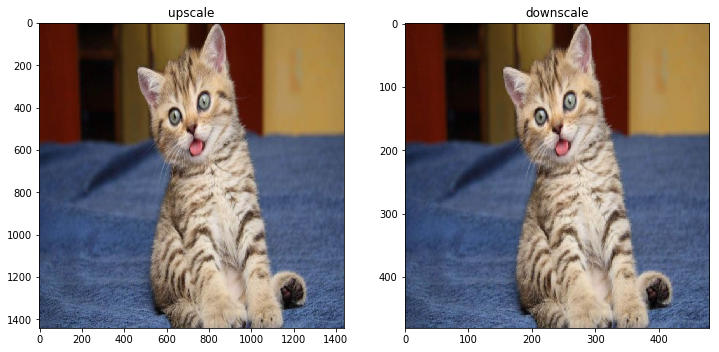

In [20]:
img4 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cat.jpg', 1)
upscale = cv2.resize(img4, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
upscale = cv2.cvtColor(upscale,cv2.COLOR_BGR2RGB)

downscale = cv2.resize(img4, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
downscale = cv2.cvtColor(downscale,cv2.COLOR_BGR2RGB)

plt.figure(num='Image transformations',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(1,2,1)
plt.title('upscale')
plt.imshow(upscale)

plt.subplot(1,2,2)
plt.title('downscale')
plt.imshow(downscale)
plt.show()

In [21]:
j = 0
for filename in dir(cv2):
  if filename.startswith('INTER_'):
    print(filename)
    j+=1
print('Ther are ' + str(j) + 'interpolation method parameters in OpenCV')

INTER_AREA
INTER_BITS
INTER_BITS2
INTER_CUBIC
INTER_LANCZOS4
INTER_LINEAR
INTER_LINEAR_EXACT
INTER_MAX
INTER_NEAREST
INTER_TAB_SIZE
INTER_TAB_SIZE2
Ther are 11interpolation method parameters in OpenCV


# Translation, rotation, and affine transformation

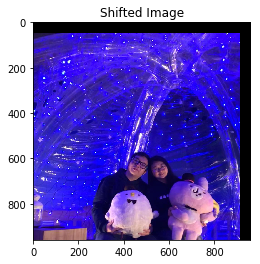

In [22]:
img5 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
input = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
rows, cols, channel = input.shape
T = np.float32([[1,0,-50],[0,1,50]])
output = cv2.warpAffine(input, T, (cols,rows))
plt.imshow(output), plt.title('Shifted Image')
plt.show()

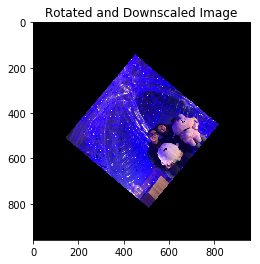

In [23]:
img6 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
input = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
rows, cols, channel = input.shape
R = cv2.getRotationMatrix2D((cols/2,rows/2),50,0.5)
output = cv2.warpAffine(input,R,(cols,rows))
plt.imshow(output), plt.title('Rotated and Downscaled Image')
plt.show()

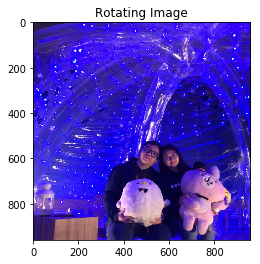

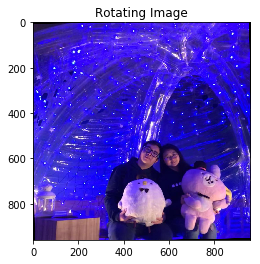

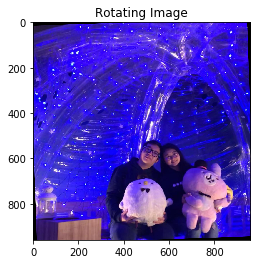

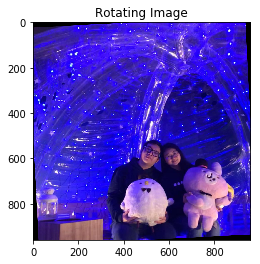

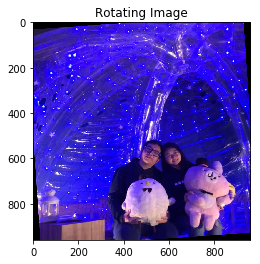

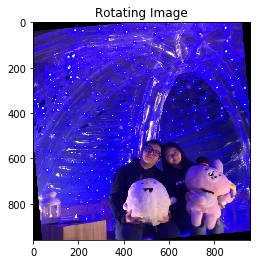

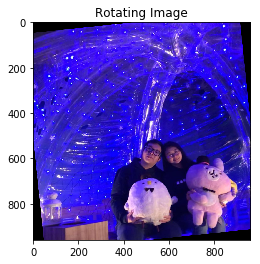

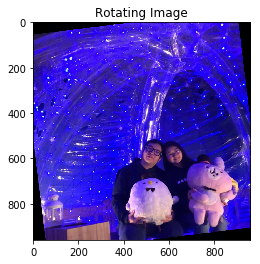

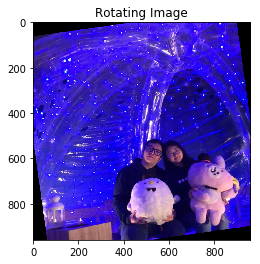

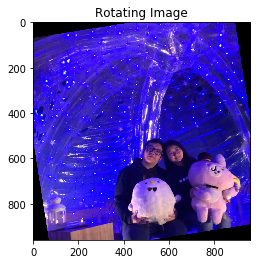

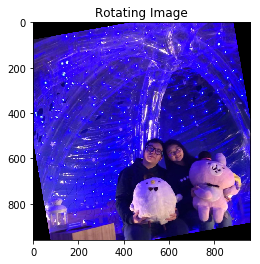

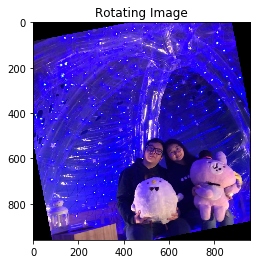

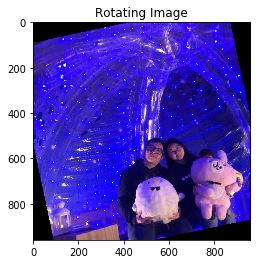

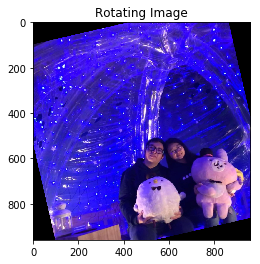

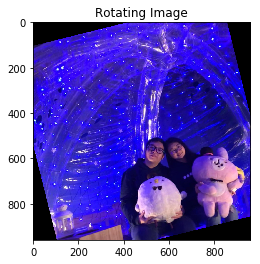

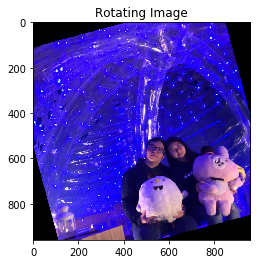

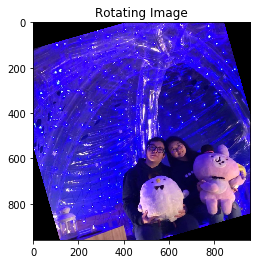

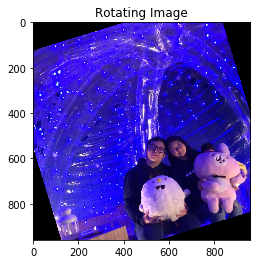

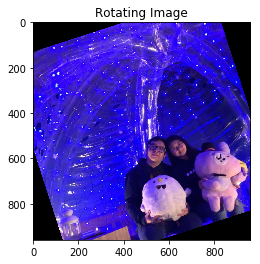

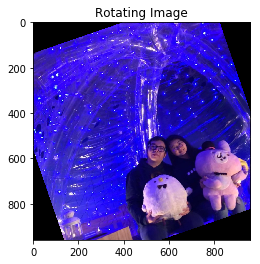

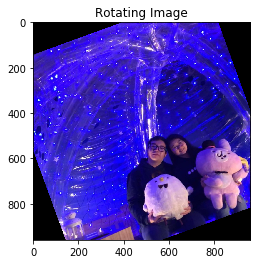

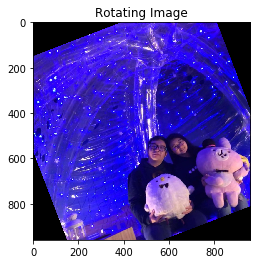

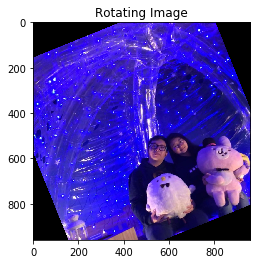

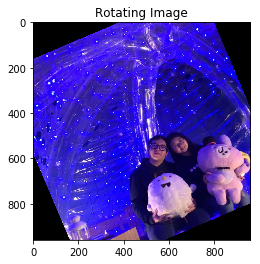

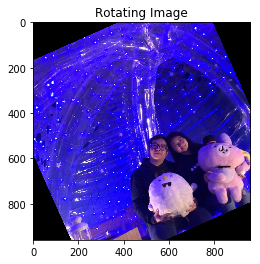

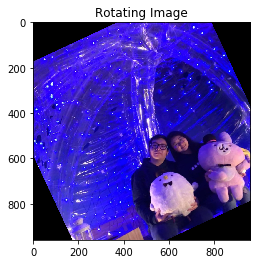

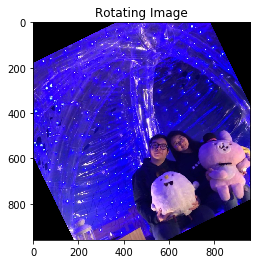

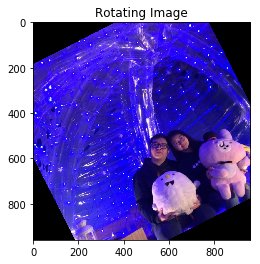

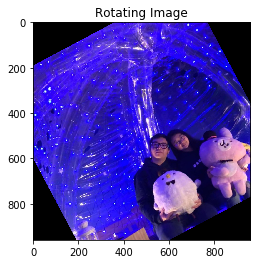

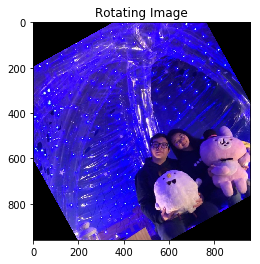

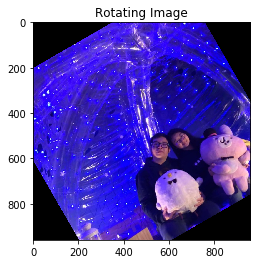

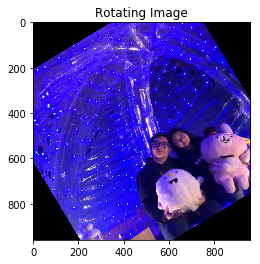

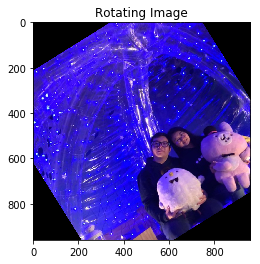

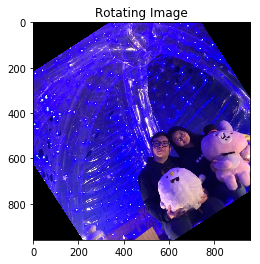

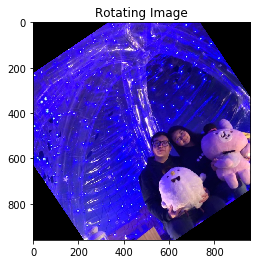

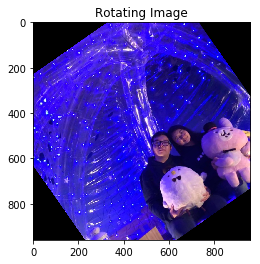

KeyboardInterrupt: ignored

In [24]:
from time import sleep
img7 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
input = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
rows, cols, channel = input.shape

angle = 0
while(1):
  if angle ==360:
    angle = 0
  M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
  rotated = cv2.warpAffine(input,M,(cols,rows))
  plt.imshow(rotated), plt.title('Rotating Image')
  plt.show()
  angle += 1
  sleep(0.2)

In [0]:
# from time import sleep
# from google.colab.patches import cv2_imshow
# img8 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
# # input = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
# rows, cols, channel = img8.shape

# angle = 0
# while(1):
#   if angle ==360:
#     angle = 0
#   M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
#   rotated = cv2.warpAffine(img7,M,(cols,rows))
# #   plt.imshow(rotated), plt.title('Rotating Image')
# #   plt.show()
#   cv2_imshow(rotated)
#   angle += 1
#   sleep(0.2)

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img9 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
input = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
rows, cols, channel = input.shape
points1 = np.float32([[100,100],[300,100],[100,300]])
points2 = np.float32([[200,150],[400,150],[100,300]])

A = cv2.getAffineTransform(points1,points2)
output = cv2.warpAffine(input,A,(cols,rows))

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.subplot(122),plt.imshow(output),plt.title('Affine Output')
plt.show()

# Perspective transfomation

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img10 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
input = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)
rows, cols, channel = input.shape
points1 = np.float32([[0,0],[400,0],[0,400],[400,400]])
points2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

P = cv2.getPerspectiveTransform(points1,points2)
output = cv2.warpPerspective(input,P,(300,300))

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.subplot(122),plt.imshow(output),plt.title('Perspective Transform')
plt.show()

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img11 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 1)
input = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
rows, cols, channel = input.shape
points1 = np.float32([[0,0],[400,0],[0,400],[400,400]])
points2 = np.float32([[0,100],[300,0],[100,300],[300,300]])

P = cv2.getPerspectiveTransform(points1,points2)
output = cv2.warpPerspective(input,P,(300,300))

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.subplot(122),plt.imshow(output),plt.title('Perspective Transform')
plt.show()

# Thresholding image

* work best on grayscale images

* 1.cv2.threshold()

* 2.cv2.THRESH_BINARY:

In [0]:
j = 0
for filename in dir(cv2):
  if filename.startswith('THRESH'):
    print(filename)
    j+=1
print('Ther are ' + str(j) + 'threshold method parameters in OpenCV')

In [0]:
import cv2
from matplotlib import pyplot as plt

img12 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cat.jpg', 0)
th = 127
max_val = 255
ret, o1 = cv2.threshold(img12,th,max_val,cv2.THRESH_BINARY)
ret, o2 = cv2.threshold(img12,th,max_val,cv2.THRESH_BINARY_INV)
ret, o3 = cv2.threshold(img12,th,max_val,cv2.THRESH_TOZERO)
ret, o4 = cv2.threshold(img12,th,max_val,cv2.THRESH_TOZERO_INV)
ret, o5 = cv2.threshold(img12,th,max_val,cv2.THRESH_TRUNC)

titles = ['Input Image','BINARY','BINARY_INV','TOZERO','TOZERO_INV','TRUNC']
output = [img12, o1, o2, o3, o4, o5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(output[i],cmap='gray'),plt.title(titles[i]),plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
import cv2
from matplotlib import pyplot as plt

img13 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 0)

ret, output = cv2.threshold(img13,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img13,cmap='gray'),plt.title('Tanker origin'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(output,cmap='gray'),plt.title('Tanker threshold'),plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
import cv2
import matplotlib.pyplot as plt

img14 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 0) #直接读为灰度图像
ret,th1 = cv2.threshold(img14,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img14,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2) #换行符号 \
th3 = cv2.adaptiveThreshold(img14,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2) #换行符号 \
images = [img14,th1,th2,th3]
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
plt.show()

In [0]:
import cv2
import matplotlib.pyplot as plt

img14 = cv2.imread('/content/drive/My Drive/107-2Multimedia/cy.jpg', 0) #直接读为灰度图像
ret,th1 = cv2.threshold(img14,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img14,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2) #换行符号 \
th3 = cv2.adaptiveThreshold(img14,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2) #换行符号 \
images = [img14,th1,th2,th3]
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
plt.show()

* https://blog.csdn.net/on2way/article/details/46812121
* http://monkeycoding.com/?p=603